In [1]:
from pyFrame import Frame, Beam
import ipywidgets as widgets
import copy
import math

# 25-30 Truss

In [2]:
Truss2530 = Frame.Frame()

### Define Materials

In [3]:
#C24 Norm for German Construction wood in mm
E = 1.6*10**6 #PSI
G = E/1.592
Pine = Beam.Material(E,G)

### Define Crosssections

In [4]:
def rect_crosssection(width, height):
    return Beam.Crosssection([(0,0),(0,height),(width,height),(width,0)])

In [5]:
section = rect_crosssection(2,6)


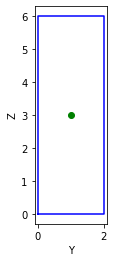

In [6]:
section.plot()

## Create Base Frame

### Define Nodes

In [7]:
#in inches
total_width = 24*12
spacing = 6*12
tan30 = 3**(1/2)/3

Truss2530.addNode('B1',   0,0,0)
Truss2530.addNode('B2',total_width/2 - spacing,0,0)
Truss2530.addNode('B3',total_width/2,0,0)
Truss2530.addNode('B4',total_width/2 + spacing,0,0)
Truss2530.addNode('B5',total_width,0,0)

Truss2530.addNode('T1',total_width/2 - spacing,0,tan30*(total_width/2 - spacing))
Truss2530.addNode('T2',total_width/2,0,tan30*(total_width/2))
Truss2530.addNode('T3',total_width/2 + spacing,0,tan30*(total_width/2 - spacing))

### Add Members

In [8]:
#add Members 
Truss2530.addMember('H1', 'B1','B2', Pine, section)
Truss2530.addMember('H2', 'B2','B3', Pine, section)
Truss2530.addMember('H3', 'B3','B4', Pine, section)
Truss2530.addMember('H4', 'B4','B5', Pine, section)

Truss2530.addMember('R1', 'B1','T1', Pine, section)
Truss2530.addMember('R2', 'T1','T2', Pine, section)
Truss2530.addMember('R3', 'T2','T3', Pine, section)
Truss2530.addMember('R4', 'T3','B5', Pine, section)

Truss2530.addMember('V1', 'B2','T1', Pine, section)
Truss2530.addMember('V2', 'B3','T2', Pine, section)
Truss2530.addMember('V3', 'B4','T3', Pine, section)

Truss2530.addMember('D1', 'T1','B3', Pine, section)
Truss2530.addMember('D2', 'B3','T3', Pine, section)

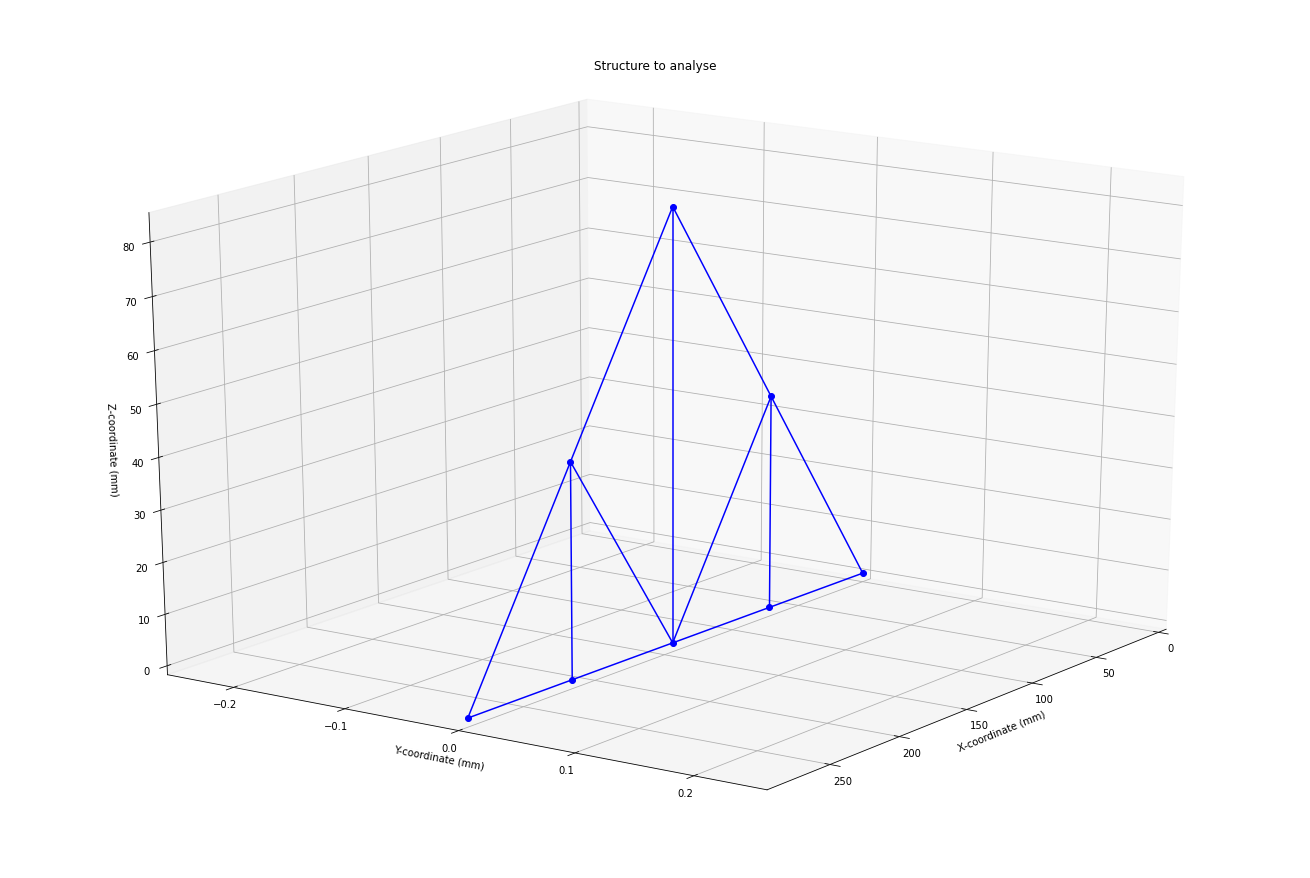

In [9]:
Truss2530.plot(deformed=False, showMemberName= False, showNodeName = False);

In [10]:
#create supports 
Truss2530.makeSupport('B1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
Truss2530.makeSupport('B5', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [11]:
#convert Frame to truss
for mbr_name, mbr in Truss2530.Members.items():
    
    nName = mbr.nNode.Name
    pName = mbr.pNode.Name
    if nName != 'B1' and nName != 'B5' and pName != 'B1' and pName != 'B5':
        Truss2530.makeRelease(mbr_name,pName, Rx=True,Ry=True,Rz=True)
        Truss2530.makeRelease(mbr_name,pName, Rx=True,Ry=True,Rz=True)

In [12]:
#set Nodal loads
cos30 = 3**(1/2)/2
sin30 = 1/2
load = 1597

Truss2530.addNodeLoad('B1', Fx=sin30*load, Fz=-cos30*load)
Truss2530.addNodeLoad('T1', Fx=sin30*load, Fz=-cos30*load)
Truss2530.addNodeLoad('T2', Fx=sin30*load/2, Fz=-cos30*load/2)
Truss2530.addNodeLoad('T2', Fx=-sin30*load/2, Fz=-cos30*load/2)
Truss2530.addNodeLoad('T3', Fx=-sin30*load, Fz=-cos30*load)
Truss2530.addNodeLoad('B5', Fx=-sin30*load, Fz=-cos30*load)

In [13]:
Truss2530.analyze()

In [29]:
#BedFrame.plot()
widgets.interact(Truss2530.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,400,10))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [15]:
Truss2530.Nodes['B3'].Uz

-0.06927082400510608

# 25-45 Truss

In [16]:
Truss2545 = Frame.Frame()

### Define Materials

In [17]:
#C24 Norm for German Construction wood in mm
E = 1.6*10**6 #PSI
G = E/1.592
Pine = Beam.Material(E,G)

### Define Crosssections

In [18]:
def rect_crosssection(width, height):
    return Beam.Crosssection([(0,0),(0,height),(width,height),(width,0)])

In [19]:
section = rect_crosssection(2,6)


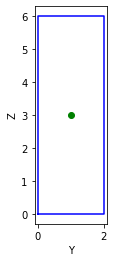

In [20]:
section.plot()

## Create Base Frame

### Define Nodes

In [21]:
#in inches
total_width = 24*12
spacing = 6*12
tan45 = 1

Truss2545.addNode('B1',   0,0,0)
Truss2545.addNode('B2',total_width/2 - spacing,0,0)
Truss2545.addNode('B3',total_width/2,0,0)
Truss2545.addNode('B4',total_width/2 + spacing,0,0)
Truss2545.addNode('B5',total_width,0,0)

Truss2545.addNode('T1',total_width/2 - spacing,0,tan45*(total_width/2 - spacing))
Truss2545.addNode('T2',total_width/2,0,tan45*(total_width/2))
Truss2545.addNode('T3',total_width/2 + spacing,0,tan45*(total_width/2 - spacing))

### Add Members

In [22]:
#add Members 
Truss2545.addMember('H1', 'B1','B2', Pine, section)
Truss2545.addMember('H2', 'B2','B3', Pine, section)
Truss2545.addMember('H3', 'B3','B4', Pine, section)
Truss2545.addMember('H4', 'B4','B5', Pine, section)

Truss2545.addMember('R1', 'B1','T1', Pine, section)
Truss2545.addMember('R2', 'T1','T2', Pine, section)
Truss2545.addMember('R3', 'T2','T3', Pine, section)
Truss2545.addMember('R4', 'T3','B5', Pine, section)

Truss2545.addMember('V1', 'B2','T1', Pine, section)
Truss2545.addMember('V2', 'B3','T2', Pine, section)
Truss2545.addMember('V3', 'B4','T3', Pine, section)

Truss2545.addMember('D1', 'T1','B3', Pine, section)
Truss2545.addMember('D2', 'B3','T3', Pine, section)

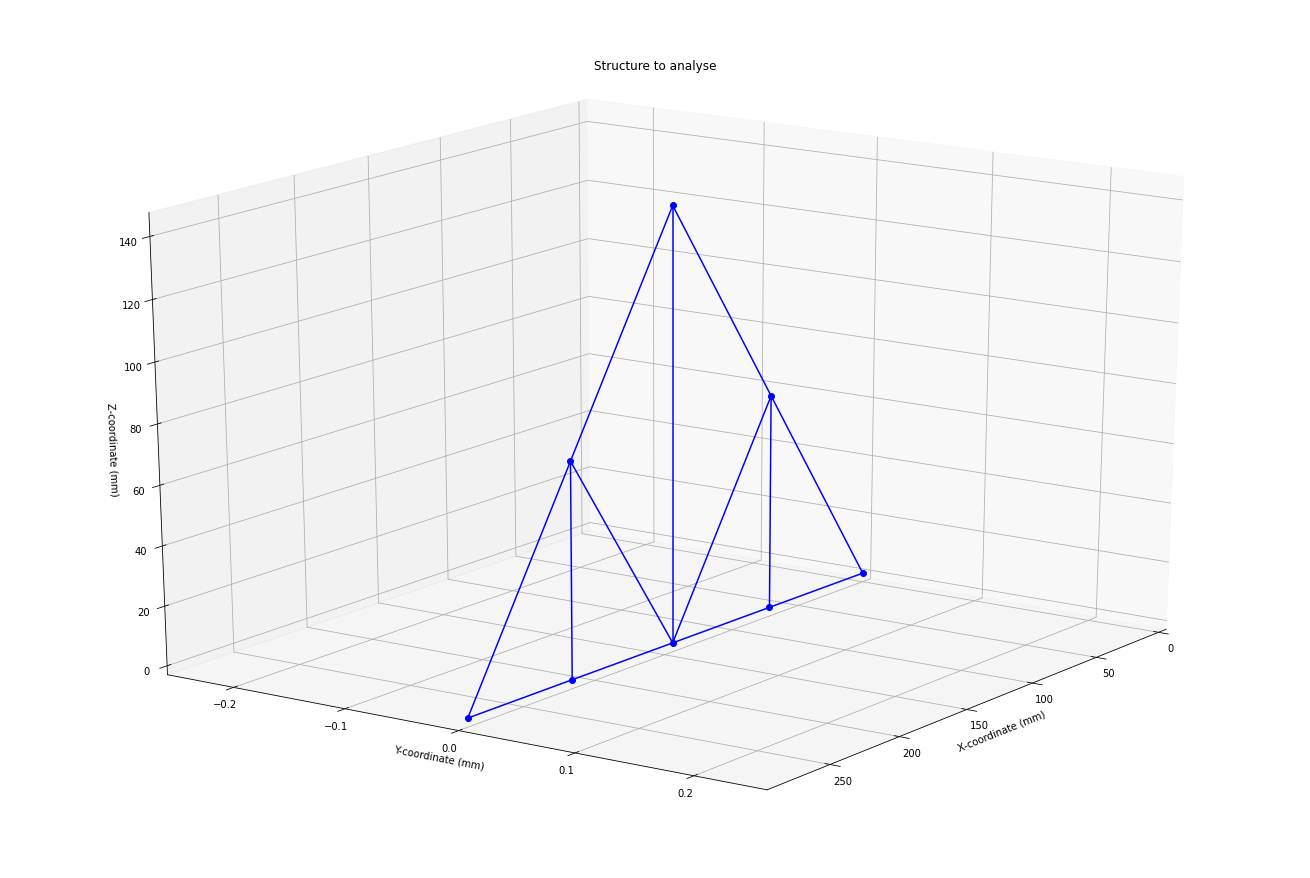

In [23]:
Truss2545.plot(deformed=False, showMemberName= False, showNodeName = False);

In [24]:
#create supports 
Truss2545.makeSupport('B1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
Truss2545.makeSupport('B5', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [25]:
#set Nodal loads
cos45 = 2**(1/2)/2
sin45 = cos45
load = 1597

Truss2545.addNodeLoad('B1', Fx=sin45*load, Fz=-cos45*load)
Truss2545.addNodeLoad('T1', Fx=sin45*load, Fz=-cos45*load)
Truss2545.addNodeLoad('T2', Fx=sin45*load/2, Fz=-cos45*load/2)
Truss2545.addNodeLoad('T2', Fx=-sin45*load/2, Fz=-cos45*load/2)
Truss2545.addNodeLoad('T3', Fx=-sin45*load, Fz=-cos45*load)
Truss2545.addNodeLoad('B5', Fx=-sin45*load, Fz=-cos45*load)

In [26]:
Truss2545.analyze()

In [27]:
#BedFrame.plot()
widgets.interact(Truss2545.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,400,10))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [28]:
Truss2545.Nodes['B3'].Uz

-0.05118895732373691